In [596]:
#Import Libraries
import pandas as pd
from matplotlib import pyplot as plt
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [597]:
#Read File
file=pd.read_csv("File.csv",na_values='?')
file = file.sample(frac=1).reset_index(drop=True)   #shuffle rows since order fixed
c1=list(file['C1'])
c2=list(file['C2'])
c3=list(file['C3'])
c4=list(file['C4'])
c5=list(file['C5'])
c6=list(file['C6'])
c7=list(file['C7'])
c8=list(file['C8'])
c9=list(file['C9'])
c10=list(file['C10'])
c11=list(file['C11'])
c12=list(file['C12'])
c13=list(file['C13'])
c14=list(file['C14'])
c15=list(file['C15'])
renewal=list(file['Renewal'])

In [598]:
file.drop_duplicates()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,Renewal
0,a,21.67,11.500,y,p,j,j,0.000,t,t,11,t,g,0.0,0,1
1,a,38.58,5.000,u,g,cc,v,13.500,t,f,0,t,g,980.0,0,0
2,a,38.25,6.000,u,g,k,v,1.000,t,f,0,t,g,0.0,0,1
3,b,31.33,19.500,u,g,c,v,7.000,t,t,16,f,g,0.0,5000,1
4,a,41.17,6.500,u,g,q,v,0.500,t,t,3,t,g,145.0,0,1
5,a,NaN,11.250,u,g,ff,ff,0.000,f,f,0,f,g,NaN,5200,0
6,b,40.58,5.000,u,g,c,v,5.000,t,t,7,f,g,0.0,3065,1
7,b,41.75,0.960,u,g,x,v,2.500,t,f,0,f,g,510.0,600,1
8,b,29.42,1.250,u,g,w,v,1.750,f,f,0,f,g,200.0,0,0
9,b,30.33,0.500,u,g,d,h,0.085,f,f,0,t,s,252.0,0,0


In [599]:
file.describe(percentiles=[0.25,0.5,0.75,0.95])

,C2,C3,C8,C11,C14,C15,Renewal
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507,0.444928
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598,0.497318
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000,0.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000,1.000000
95%,56.432000,14.000000,8.568750,11.00000,460.000000,4119.400000,1.000000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000,1.000000


In [600]:
print("For C1")
counts = file['C1'].value_counts()
print(counts)
print(set(c1))
index=[i for i in range(len(c1)) if pd.isnull(c1[i]) ]
print(index)

For C1
b    468
a    210
Name: C1, dtype: int64
{nan, 'b', 'a'}
[21, 75, 162, 191, 220, 261, 358, 414, 552, 574, 599, 688]


For C2
[5, 19, 42, 121, 140, 293, 305, 320, 433, 497, 615, 669]


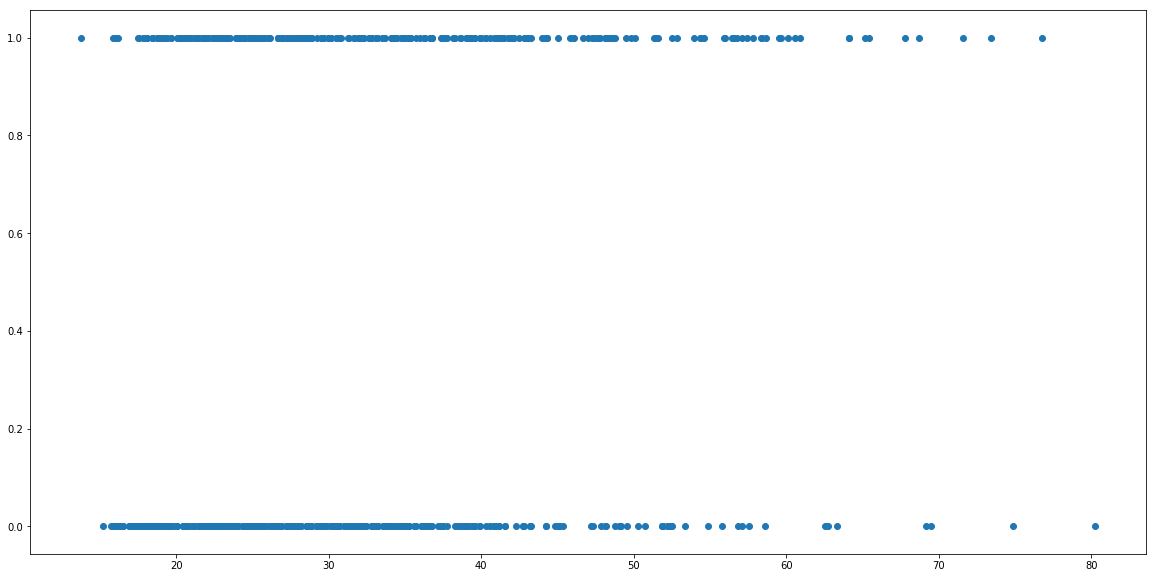

In [601]:
print("For C2")
plt.figure(figsize=(20,10))
plt.scatter(c2,renewal)
index=[i for i in range(len(c2)) if pd.isnull(c2[i]) ]
print(index)

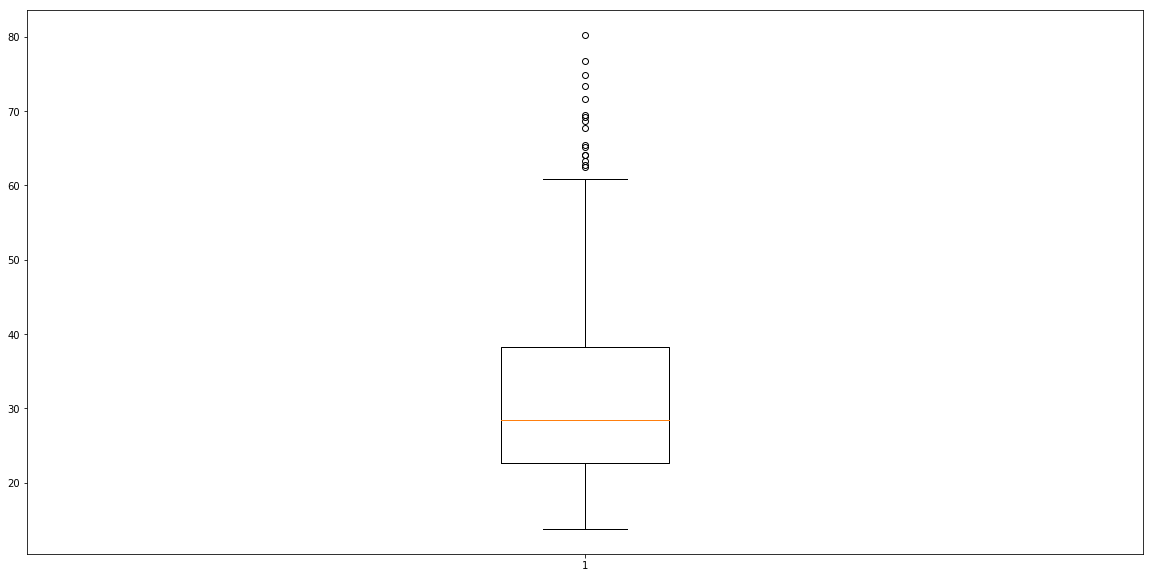

In [602]:
plt.figure(figsize=(20,10))
c2_copy=[c2[i] for i in range(len(c2)) if i not in index]
plt.boxplot(c2_copy)
plt.show()

For C3


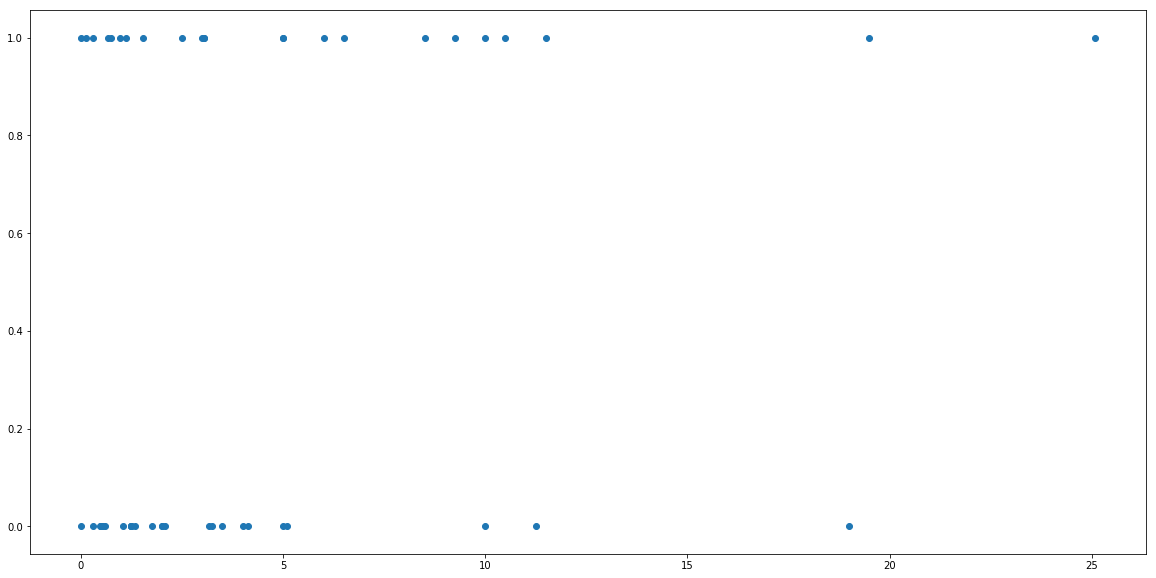

In [603]:
print("For C3")
plt.figure(figsize=(20,10))
no=range(1,691)
plt.scatter(c3[:50],renewal[:50])

{'boxes': [<matplotlib.lines.Line2D at 0x1177361d0>],
 'caps': [<matplotlib.lines.Line2D at 0x117736be0>,
 'fliers': [<matplotlib.lines.Line2D at 0x117741898>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x117741470>],
 'whiskers': [<matplotlib.lines.Line2D at 0x117736320>,
  <matplotlib.lines.Line2D at 0x1177367b8>]}

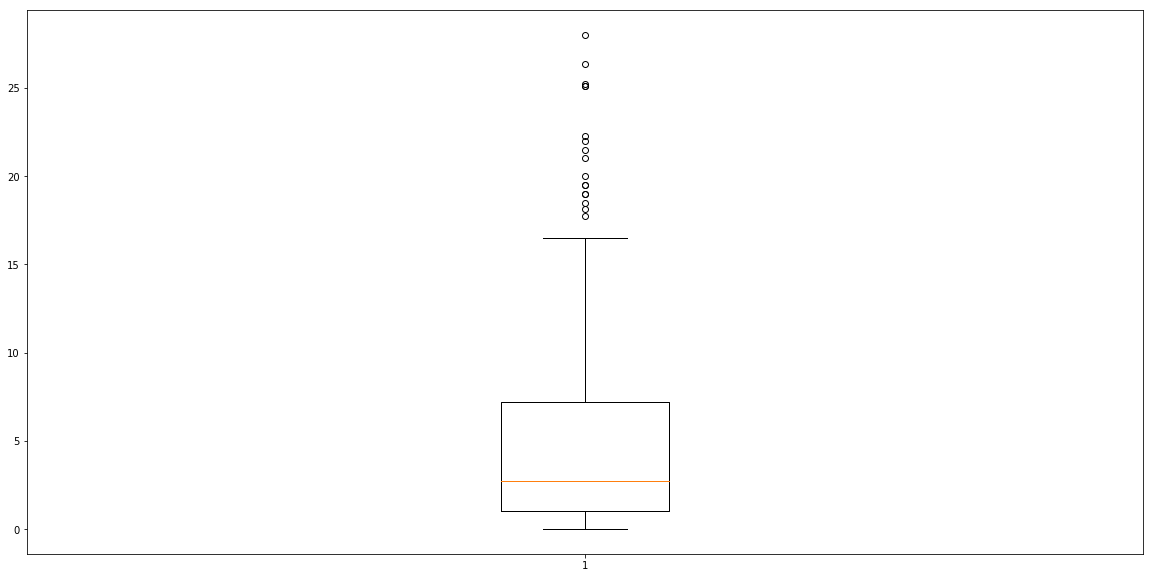

In [604]:
plt.figure(figsize=(20,10))
plt.boxplot(c3)

{'boxes': [<matplotlib.lines.Line2D at 0x117797390>],
 'caps': [<matplotlib.lines.Line2D at 0x117797da0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1177a0a58>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1177a0630>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1177974e0>,
  <matplotlib.lines.Line2D at 0x117797978>]}

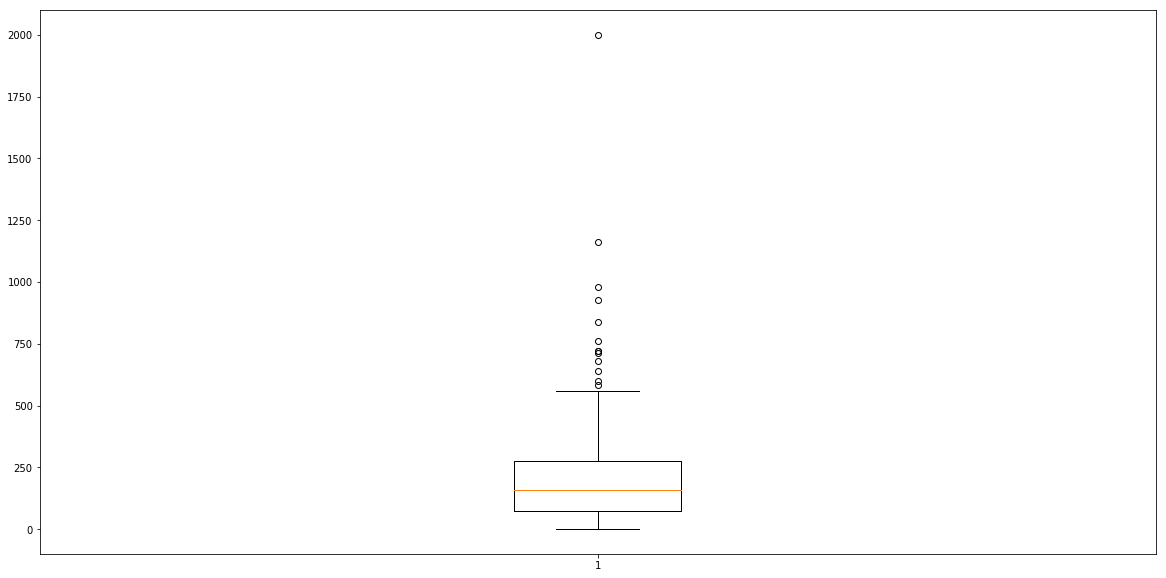

In [605]:
plt.figure(figsize=(20,10))
index=[i for i in range(len(c14)) if pd.isnull(c14[i]) ]
c14_copy=[c14[i] for i in range(len(c14)) if i not in index]
plt.boxplot(c14_copy)


# Outlier Removal

In [607]:
counts = file['C1'].value_counts()
file['C1']=file['C1'].astype('category').cat.codes
print(counts)
index=[i for i in range(len(c4)) if file['C1'][i]==0]
print(index)

 1    468
 0    210
-1     12
Name: C1, dtype: int64
[21, 75, 162, 191, 220, 261, 358, 414, 552, 574, 599, 688]


In [611]:
counts = file['C4'].value_counts()
file['C4']=file['C4'].astype('category').cat.codes
print(counts)
index=[i for i in range(len(c4)) if file['C4'][i]==0]
print(index)

 1    519
 2    163
-1      6
 0      2
Name: C4, dtype: int64
[172, 362, 394, 395, 434, 505]


In [612]:
counts = file['C5'].value_counts()
file['C5']=file['C5'].astype('category').cat.codes
print(counts)
index=[i for i in range(len(c5)) if file['C5'][i]==0]
print(index)

1    519
3    163
0      6
2      2
Name: C5, dtype: int64
[172, 362, 394, 395, 434, 505]


In [615]:
counts = file['C6'].value_counts()
file['C6']=file['C6'].astype('category').cat.codes
print(counts)
index=[i for i in range(len(c6)) if file['C6'][i]==0]
print(index)

2     137
11     78
13     64
7      59
1      54
6      53
9      51
3      41
14     38
10     38
4      30
5      25
8      10
0       9
12      3
Name: C6, dtype: int64
[75, 110, 172, 362, 394, 395, 434, 505, 599]


In [618]:
counts = file['C7'].value_counts()
file['C7']=file['C7'].astype('category').cat.codes
print(counts)
index=[i for i in range(len(c7)) if file['C7'][i]==0]
print(index)

8    399
4    138
1     59
3     57
0      9
9      8
5      8
2      6
6      4
7      2
Name: C7, dtype: int64
[75, 110, 172, 362, 394, 395, 434, 505, 599]


In [619]:
counts = file['C9'].value_counts()
file['C9']=file['C9'].astype('category').cat.codes
print(counts)

t    361
f    329
Name: C9, dtype: int64


In [620]:
counts = file['C10'].value_counts()
file['C10']=file['C10'].astype('category').cat.codes
print(counts)

f    395
t    295
Name: C10, dtype: int64


In [621]:
counts = file['C12'].value_counts()
file['C12']=file['C12'].astype('category').cat.codes
print(counts)

f    374
t    316
Name: C12, dtype: int64


In [622]:
counts = file['C13'].value_counts()
file['C13']=file['C13'].astype('category').cat.codes
print(counts)

g    625
s     57
p      8
Name: C13, dtype: int64


In [623]:
#XGBoost For Baseline Setup
dataset=file.as_matrix()
X=dataset[:,:-1]
Y=dataset[:,-1]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=7)
model = XGBClassifier()
model.fit(X_train, Y_train)
print(model)
Y_pred = model.predict(X_test)
predictions = [round(value) for value in Y_pred]
accuracy = f1_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)
Accuracy: 85.57%


In [624]:
del file['C5']
file.head()

,C1,C2,C3,C4,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,Renewal
0,1,21.67,11.5,3,8,5,0.0,1,1,11,1,0,0.0,0,1
1,1,38.58,5.0,2,3,8,13.5,1,0,0,1,0,980.0,0,0
2,1,38.25,6.0,2,9,8,1.0,1,0,0,1,0,0.0,0,1
3,2,31.33,19.5,2,2,8,7.0,1,1,16,0,0,0.0,5000,1
4,1,41.17,6.5,2,11,8,0.5,1,1,3,1,0,145.0,0,1


In [625]:
#XGBoost For Baseline Setup after remvoing redundant variable
dataset=file.as_matrix()
X=dataset[:,:-1]
Y=dataset[:,-1]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=7)
model = XGBClassifier()
model.fit(X_train, Y_train)
print(model)
Y_pred = model.predict(X_test)
predictions = [round(value) for value in Y_pred]
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)
Accuracy: 85.99%


# Since Dropping C5 doesnot effect accuracy of our model rather it increases ,it is redundant and hence can be dropped for further purposes

In [626]:
file=pd.read_csv("File.csv",na_values='?')


In [627]:
del file['C5']

In [628]:
file.head()

,C1,C2,C3,C4,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,Renewal
0,b,30.83,0.000,u,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,w,v,1.71,t,f,0,f,s,120.0,0,1


In [629]:
a=file['C1'].isnull()
index=[i for i in range(len(a)) if a[i]==True]
print("Missing Values for C1")
print(index)
a=file['C2'].isnull()
index=[i for i in range(len(a)) if a[i]==True]
print("Missing Values for C2")
print(index)
a=file['C3'].isnull()
index=[i for i in range(len(a)) if a[i]==True]
print("Missing Values for C3")
print(index)
a=file['C4'].isnull()
index=[i for i in range(len(a)) if a[i]==True]
print("Missing Values for C4")
print(index)
a=file['C6'].isnull()
index=[i for i in range(len(a)) if a[i]==True]
print("Missing Values for C6")
print(index)
a=file['C7'].isnull()
index=[i for i in range(len(a)) if a[i]==True]
print("Missing Values for C7")
print(index)
a=file['C8'].isnull()
index=[i for i in range(len(a)) if a[i]==True]
print("Missing Values for C8")
print(index)
a=file['C9'].isnull()
index=[i for i in range(len(a)) if a[i]==True]
print("Missing Values for C9")
print(index)
a=file['C10'].isnull()
index=[i for i in range(len(a)) if a[i]==True]
print("Missing Values for C10")
print(index)
a=file['C11'].isnull()
index=[i for i in range(len(a)) if a[i]==True]
print("Missing Values for C11")
print(index)
a=file['C12'].isnull()
index=[i for i in range(len(a)) if a[i]==True]
print("Missing Values for C12")
print(index)
a=file['C13'].isnull()
index=[i for i in range(len(a)) if a[i]==True]
print("Missing Values for C13")
print(index)
a=file['C14'].isnull()
index=[i for i in range(len(a)) if a[i]==True]
print("Missing Values for C14")
print(index)
a=file['C15'].isnull()
index=[i for i in range(len(a)) if a[i]==True]
print("Missing Values for C15")
print(index)
print(len(file['C1']))

Missing Values for C1
[248, 327, 346, 374, 453, 479, 489, 520, 598, 601, 641, 673]
Missing Values for C2
[83, 86, 92, 97, 254, 286, 329, 445, 450, 500, 515, 608]
Missing Values for C3
[]
Missing Values for C4
[206, 270, 330, 456, 592, 622]
Missing Values for C6
[206, 270, 330, 456, 479, 539, 592, 601, 622]
Missing Values for C7
[206, 270, 330, 456, 479, 539, 592, 601, 622]
Missing Values for C8
[]
Missing Values for C9
[]
Missing Values for C10
[]
Missing Values for C11
[]
Missing Values for C12
[]
Missing Values for C13
[]
Missing Values for C14
[71, 202, 206, 243, 270, 278, 330, 406, 445, 456, 592, 622, 626]
Missing Values for C15
[]
690


In [630]:
file=file.drop(file.index[[206, 270, 330, 456, 479, 539, 592, 601, 622]])
file=file.reset_index(drop=True)
file.head()

,C1,C2,C3,C4,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,Renewal
0,b,30.83,0.000,u,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,w,v,1.71,t,f,0,f,s,120.0,0,1


In [631]:
file['C2'].fillna(value=file['C2'].median(),inplace=True)

In [632]:
a=file['C1'].isnull()
index=[i for i in range(len(a)) if a[i]==True]
print("Missing Values for C1")
print(index)
a=file['C2'].isnull()
index=[i for i in range(len(a)) if a[i]==True]
print("Missing Values for C2")
print(index)
a=file['C3'].isnull()
index=[i for i in range(len(a)) if a[i]==True]
print("Missing Values for C3")
print(index)
a=file['C4'].isnull()
index=[i for i in range(len(a)) if a[i]==True]
print("Missing Values for C4")
print(index)
a=file['C6'].isnull()
index=[i for i in range(len(a)) if a[i]==True]
print("Missing Values for C6")
print(index)
a=file['C7'].isnull()
index=[i for i in range(len(a)) if a[i]==True]
print("Missing Values for C7")
print(index)
a=file['C8'].isnull()
index=[i for i in range(len(a)) if a[i]==True]
print("Missing Values for C8")
print(index)
a=file['C9'].isnull()
index=[i for i in range(len(a)) if a[i]==True]
print("Missing Values for C9")
print(index)
a=file['C10'].isnull()
index=[i for i in range(len(a)) if a[i]==True]
print("Missing Values for C10")
print(index)
a=file['C11'].isnull()
index=[i for i in range(len(a)) if a[i]==True]
print("Missing Values for C11")
print(index)
a=file['C12'].isnull()
index=[i for i in range(len(a)) if a[i]==True]
print("Missing Values for C12")
print(index)
a=file['C13'].isnull()
index=[i for i in range(len(a)) if a[i]==True]
print("Missing Values for C13")
print(index)
a=file['C14'].isnull()
index=[i for i in range(len(a)) if a[i]==True]
print("Missing Values for C14")
print(index)
a=file['C15'].isnull()
index=[i for i in range(len(a)) if a[i]==True]
print("Missing Values for C15")
print(index)

Missing Values for C1
[247, 325, 343, 371, 450, 484, 515, 591, 632, 664]
Missing Values for C2
[]
Missing Values for C3
[]
Missing Values for C4
[]
Missing Values for C6
[]
Missing Values for C7
[]
Missing Values for C8
[]
Missing Values for C9
[]
Missing Values for C10
[]
Missing Values for C11
[]
Missing Values for C12
[]
Missing Values for C13
[]
Missing Values for C14
[71, 202, 242, 276, 403, 442, 617]
Missing Values for C15
[]


In [633]:
file.describe()

,C2,C3,C8,C11,C14,C15,Renewal
count,681.000000,681.000000,681.000000,681.000000,674.000000,681.000000,681.000000
mean,31.398458,4.806990,2.251872,2.431718,184.492582,1030.330396,0.444934
std,11.664257,4.988754,3.359283,4.887119,173.997457,5243.226720,0.497324
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.670000,1.000000,0.165000,0.000000,75.250000,0.000000,0.000000
50%,28.420000,2.875000,1.000000,0.000000,160.000000,5.000000,0.000000
75%,37.500000,7.500000,2.750000,3.000000,279.000000,400.000000,1.000000
max,76.750000,28.000000,28.500000,67.000000,2000.000000,100000.000000,1.000000


In [634]:
file.corr()

,C2,C3,C8,C11,C14,C15,Renewal
C2,1.000000,0.210470,0.407407,0.196977,-0.075661,0.020707,0.169838
C3,0.210470,1.000000,0.294551,0.268035,-0.224903,0.121781,0.211192
C8,0.407407,0.294551,1.000000,0.319522,-0.078885,0.049880,0.325734
C11,0.196977,0.268035,0.319522,1.000000,-0.121664,0.062580,0.409741
C14,-0.075661,-0.224903,-0.078885,-0.121664,1.000000,0.066509,-0.103698
C15,0.020707,0.121781,0.049880,0.062580,0.066509,1.000000,0.176939
Renewal,0.169838,0.211192,0.325734,0.409741,-0.103698,0.176939,1.000000


(array([ 668.,    8.,    1.,    1.,    0.,    2.,    0.,    0.,    0.,    1.]),
 array([      0.,   10000.,   20000.,   30000.,   40000.,   50000.,
          60000.,   70000.,   80000.,   90000.,  100000.]),
 <a list of 10 Patch objects>)

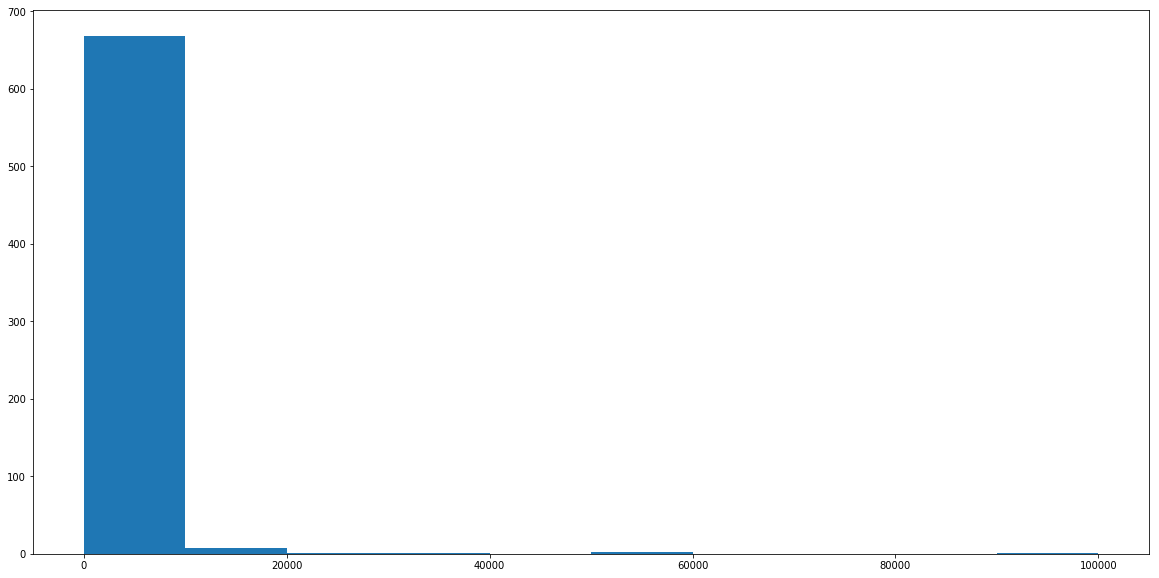

In [635]:
plt.figure(figsize=(20,10))
plt.hist(file['C15'])

In [636]:
file['C15']=[np.log(i) if i!=0 else 0 for i in file['C15'] ]

Text(0.5,1,'After Log Scaling')

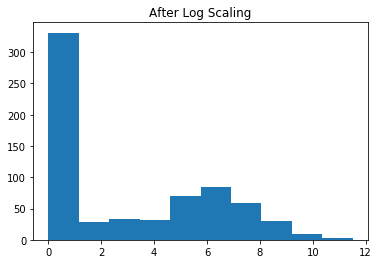

In [637]:
plt.hist(file['C15'])
plt.title("After Log Scaling")

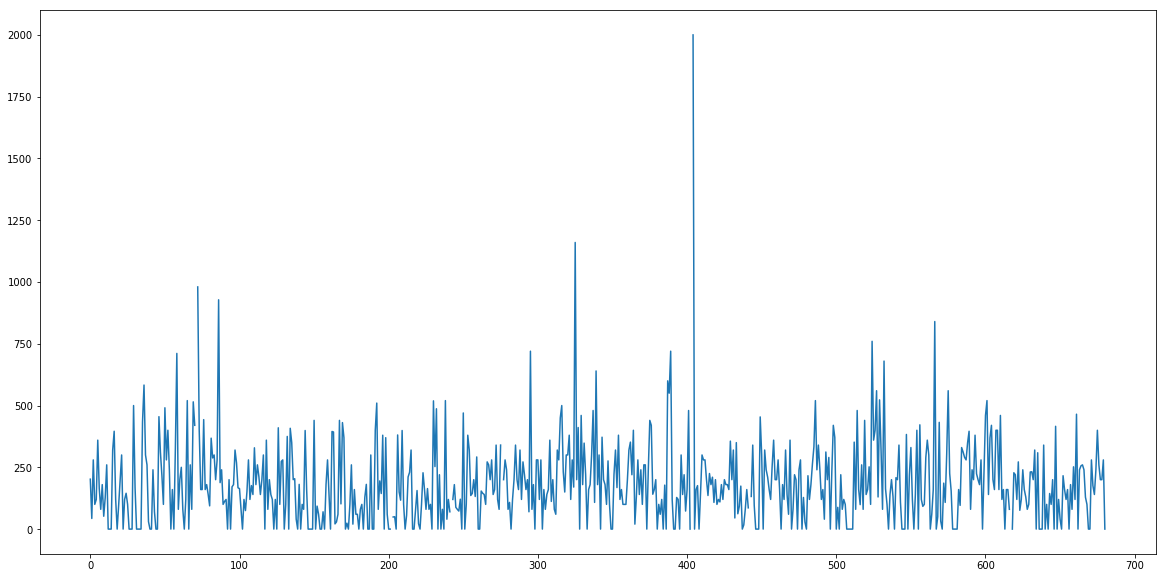

In [638]:
plt.figure(figsize=(20,10))
plt.plot(file['C14'])

(array([ 403.,  209.,   53.,    7.,    3.,    1.,    0.,    0.,    0.,    1.]),
 array([    0.,   200.,   400.,   600.,   800.,  1000.,  1200.,  1400.,
         1600.,  1800.,  2000.]),
 <a list of 10 Patch objects>)

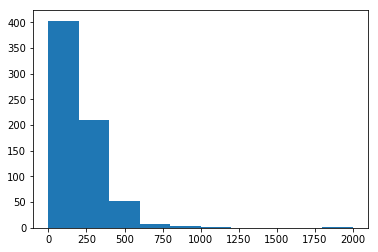

In [639]:
plt.hist(c14_copy)

In [640]:
file['C14'].fillna(value=file['C14'].median(),inplace=True)

In [641]:
file.describe(include='all')

,C1,C2,C3,C4,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,Renewal
count,671,681.000000,681.000000,681,681,681,681.000000,681,681,681.000000,681,681,681.000000,681.000000,681.000000
unique,2,NaN,NaN,3,14,9,NaN,2,2,NaN,2,3,NaN,NaN,NaN
top,b,NaN,NaN,u,c,v,NaN,t,f,NaN,f,g,NaN,NaN,NaN
freq,463,NaN,NaN,518,137,399,NaN,360,386,NaN,366,623,NaN,NaN,NaN
mean,NaN,31.398458,4.806990,NaN,NaN,NaN,2.251872,NaN,NaN,2.431718,NaN,NaN,184.240822,2.953976,0.444934
std,NaN,11.664257,4.988754,NaN,NaN,NaN,3.359283,NaN,NaN,4.887119,NaN,NaN,173.117218,3.222147,0.497324
min,NaN,13.750000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,22.670000,1.000000,NaN,NaN,NaN,0.165000,NaN,NaN,0.000000,NaN,NaN,80.000000,0.000000,0.000000
50%,NaN,28.420000,2.875000,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,NaN,NaN,160.000000,1.609438,0.000000
75%,NaN,37.500000,7.500000,NaN,NaN,NaN,2.750000,NaN,NaN,3.000000,NaN,NaN,274.000000,5.991465,1.000000


In [642]:
counts = file['C1'].value_counts()
print(counts)

b    463
a    208
Name: C1, dtype: int64


In [643]:
file['Dummy']=[str(i)+str(j) for i,j in zip(file['C1'],file['Renewal'])]

In [644]:
file.head()

,C1,C2,C3,C4,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,Renewal,Dummy
0,b,30.83,0.000,u,w,v,1.25,t,t,1,f,g,202.0,0.000000,1,b1
1,a,58.67,4.460,u,q,h,3.04,t,t,6,f,g,43.0,6.327937,1,a1
2,a,24.50,0.500,u,q,h,1.50,t,f,0,f,g,280.0,6.714171,1,a1
3,b,27.83,1.540,u,w,v,3.75,t,t,5,t,g,100.0,1.098612,1,b1
4,b,20.17,5.625,u,w,v,1.71,t,f,0,f,s,120.0,0.000000,1,b1


In [645]:
counts = file['Dummy'].value_counts()
print(counts)

b0      259
b1      204
a0      112
a1       96
nan0      7
nan1      3
Name: Dummy, dtype: int64


In [646]:
file['C1'].fillna(value='b',inplace=True)

In [647]:
file.describe(include='all')

,C1,C2,C3,C4,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,Renewal,Dummy
count,681,681.000000,681.000000,681,681,681,681.000000,681,681,681.000000,681,681,681.000000,681.000000,681.000000,681
unique,2,NaN,NaN,3,14,9,NaN,2,2,NaN,2,3,NaN,NaN,NaN,6
top,b,NaN,NaN,u,c,v,NaN,t,f,NaN,f,g,NaN,NaN,NaN,b0
freq,473,NaN,NaN,518,137,399,NaN,360,386,NaN,366,623,NaN,NaN,NaN,259
mean,NaN,31.398458,4.806990,NaN,NaN,NaN,2.251872,NaN,NaN,2.431718,NaN,NaN,184.240822,2.953976,0.444934,NaN
std,NaN,11.664257,4.988754,NaN,NaN,NaN,3.359283,NaN,NaN,4.887119,NaN,NaN,173.117218,3.222147,0.497324,NaN
min,NaN,13.750000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN
25%,NaN,22.670000,1.000000,NaN,NaN,NaN,0.165000,NaN,NaN,0.000000,NaN,NaN,80.000000,0.000000,0.000000,NaN
50%,NaN,28.420000,2.875000,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000,NaN,NaN,160.000000,1.609438,0.000000,NaN
75%,NaN,37.500000,7.500000,NaN,NaN,NaN,2.750000,NaN,NaN,3.000000,NaN,NaN,274.000000,5.991465,1.000000,NaN


In [648]:
del file['Dummy']

In [649]:
file2=file.copy()

In [650]:
file=pd.get_dummies(file,columns=['C1','C4','C9','C10','C12','C13'])
file = file[['C2', 'C3', 'C6', 'C7', 'C8', 'C11', 'C14', 'C15', 'C1_a', 'C1_b', 'C4_l', 'C4_u', 'C4_y', 'C9_f', 'C9_t', 'C10_f', 'C10_t', 'C12_f', 'C12_t', 'C13_g', 'C13_p', 'C13_s','Renewal', ]]

In [651]:
file.head(5)

,C2,C3,C6,C7,C8,C11,C14,C15,C1_a,C1_b,...,C9_f,C9_t,C10_f,C10_t,C12_f,C12_t,C13_g,C13_p,C13_s,Renewal
0,30.83,0.000,w,v,1.25,1,202.0,0.000000,0,1,...,0,1,0,1,1,0,1,0,0,1
1,58.67,4.460,q,h,3.04,6,43.0,6.327937,1,0,...,0,1,0,1,1,0,1,0,0,1
2,24.50,0.500,q,h,1.50,0,280.0,6.714171,1,0,...,0,1,1,0,1,0,1,0,0,1
3,27.83,1.540,w,v,3.75,5,100.0,1.098612,0,1,...,0,1,0,1,0,1,1,0,0,1
4,20.17,5.625,w,v,1.71,0,120.0,0.000000,0,1,...,0,1,1,0,1,0,0,0,1,1


In [652]:
label=LabelEncoder()
label.fit(file['C6'])
label.classes_
file['C6']=label.transform(file['C6'])

In [653]:
label=LabelEncoder()
label.fit(file['C7'])
label.classes_
file['C7']=label.transform(file['C7'])

In [654]:
file.head()

,C2,C3,C6,C7,C8,C11,C14,C15,C1_a,C1_b,...,C9_f,C9_t,C10_f,C10_t,C12_f,C12_t,C13_g,C13_p,C13_s,Renewal
0,30.83,0.000,12,7,1.25,1,202.0,0.000000,0,1,...,0,1,0,1,1,0,1,0,0,1
1,58.67,4.460,10,3,3.04,6,43.0,6.327937,1,0,...,0,1,0,1,1,0,1,0,0,1
2,24.50,0.500,10,3,1.50,0,280.0,6.714171,1,0,...,0,1,1,0,1,0,1,0,0,1
3,27.83,1.540,12,7,3.75,5,100.0,1.098612,0,1,...,0,1,0,1,0,1,1,0,0,1
4,20.17,5.625,12,7,1.71,0,120.0,0.000000,0,1,...,0,1,1,0,1,0,0,0,1,1


In [655]:
#Shuffle
file = file.sample(frac=1).reset_index(drop=True) 

In [656]:
file.head()

,C2,C3,C6,C7,C8,C11,C14,C15,C1_a,C1_b,...,C9_f,C9_t,C10_f,C10_t,C12_f,C12_t,C13_g,C13_p,C13_s,Renewal
0,20.00,7.000,1,7,0.500,0,0.0,0.000000,0,1,...,1,0,1,0,1,0,1,0,0,0
1,23.92,0.585,2,3,0.125,0,240.0,0.000000,0,1,...,1,0,1,0,1,0,1,0,0,0
2,27.83,1.540,12,7,3.750,5,100.0,1.098612,0,1,...,0,1,0,1,0,1,1,0,0,1
3,27.83,1.500,12,7,2.000,11,434.0,3.555348,0,1,...,0,1,0,1,0,1,1,0,0,1
4,36.00,1.000,1,7,2.000,11,0.0,6.122493,1,0,...,0,1,0,1,1,0,1,0,0,1


In [657]:
#Applying XGBoost
dataset=file.as_matrix()
X=dataset[:,:-1]
Y=dataset[:,-1]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=7)
model = XGBClassifier()
model.fit(X_train, Y_train)
print(model)
Y_pred = model.predict(X_test)
predictions = [round(value) for value in Y_pred]
accuracy = f1_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)
Accuracy: 87.18%


In [658]:
rf = RandomForestClassifier(n_jobs=-1, random_state=0,n_estimators=100,oob_score=True)
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

In [660]:
Y_pred=rf.predict(X_test)
accuracy = f1_score(Y_test, Y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 88.44%


In [661]:
features_list=list(zip(file.columns, rf.feature_importances_))

In [662]:
print(features_list)

[('C2', 0.06659462827255401), ('C3', 0.056724528928277868), ('C6', 0.041616025324206996), ('C7', 0.023773409926828172), ('C8', 0.071613667494862462), ('C11', 0.085194808199477057), ('C14', 0.065071327281827129), ('C15', 0.084212088623735554), ('C1_a', 0.0079039437869336919), ('C1_b', 0.0086394030609777354), ('C4_l', 0.0049630383644030038), ('C4_u', 0.01090844957023847), ('C4_y', 0.012150311392605515), ('C9_f', 0.14601541270895835), ('C9_t', 0.20021417832993391), ('C10_f', 0.039640464197655455), ('C10_t', 0.047638319447404716), ('C12_f', 0.0081929904766291708), ('C12_t', 0.0071972051912265848), ('C13_g', 0.0063789386405821392), ('C13_p', 0.00078209251305470849), ('C13_s', 0.0045747682676273473)]


In [663]:
features_list.sort(key=lambda x:x[1],reverse=True)

In [664]:
for i in features_list:
    print(i)

('C9_t', 0.20021417832993391)
('C9_f', 0.14601541270895835)
('C11', 0.085194808199477057)
('C15', 0.084212088623735554)
('C8', 0.071613667494862462)
('C2', 0.06659462827255401)
('C14', 0.065071327281827129)
('C3', 0.056724528928277868)
('C10_t', 0.047638319447404716)
('C6', 0.041616025324206996)
('C10_f', 0.039640464197655455)
('C7', 0.023773409926828172)
('C4_y', 0.012150311392605515)
('C4_u', 0.01090844957023847)
('C1_b', 0.0086394030609777354)
('C12_f', 0.0081929904766291708)
('C1_a', 0.0079039437869336919)
('C12_t', 0.0071972051912265848)
('C13_g', 0.0063789386405821392)
('C4_l', 0.0049630383644030038)
('C13_s', 0.0045747682676273473)
('C13_p', 0.00078209251305470849)
